In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
os.chdir("C:\\Users\\Admin\\Desktop\\Training\\DSP29\\Logistic\\python1")

In [3]:
os.listdir()

['bankloan.sas7bdat',
 'cust.csv',
 'cust_with_p.xlsx',
 'Data.csv',
 'Logistic Regression-Model Building Template_V1.xlsx',
 'Logistic.ipynb',
 'Pred_actua.csv',
 'x_train.xlsx']

In [4]:
df=pd.read_sas("bankloan.sas7bdat", encoding='iso-8859-1')

In [5]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [6]:
df.to_csv("Data.csv", index=False)

In [6]:
d=df.default.value_counts(dropna=False)

In [7]:
d

0.0    517
1.0    183
NaN    150
Name: default, dtype: int64

In [8]:
d[0]/(d[0]+d[1]) # 73% non fraud , 27% Fraud 

0.7385714285714285

In [9]:
df["default"].isnull().sum() # count of missing where there is no 

150

In [10]:
df_new_customer=df[df.default.isnull()]

In [11]:
df_new_customer.to_csv("cust.csv")

In [12]:
df_new_customer

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,NaN
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,NaN
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,NaN
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,NaN
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [13]:
data=df[df.default.notnull()]

In [14]:
data

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36.0,2.0,6.0,15.0,27.0,4.6,0.262062,0.979938,1.0
696,29.0,2.0,6.0,4.0,21.0,11.5,0.369495,2.045505,0.0
697,33.0,1.0,15.0,3.0,32.0,7.6,0.491264,1.940736,0.0
698,45.0,1.0,19.0,22.0,77.0,8.4,2.302608,4.165392,0.0


In [15]:
y=data["default"]

In [16]:
x=data.drop(columns=["default"])

In [17]:
x.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
help(logisticRegr)

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', '

In [21]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.8


In [22]:
predictions = logisticRegr.predict(x_train)


In [24]:
predictions

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [25]:
x_train["Predicted_Prob"]=logisticRegr.predict_proba(x_train)[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
x_train["predicted_default"]=predictions

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
x_train["Default"]=y_train

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
x_train.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,Predicted_Prob,predicted_default,Default
165,40.0,2.0,13.0,11.0,102.0,18.9,6.226794,13.051206,0.720232,1.0,1.0
553,47.0,2.0,17.0,23.0,41.0,9.5,0.455715,3.439285,0.002491,0.0,0.0
34,25.0,1.0,8.0,1.0,35.0,2.9,0.077140,0.937860,0.077109,0.0,0.0
685,35.0,1.0,7.0,5.0,39.0,16.1,1.701609,4.577391,0.359328,0.0,1.0
200,28.0,1.0,3.0,7.0,19.0,4.1,0.260965,0.518035,0.173130,0.0,0.0


In [29]:
x_train.to_csv("C:\\Users\\Admin\\Desktop\\Training\\DSP31\\Python\\Logistics\\train_data.csv")

In [30]:
x_train

,age,ed,employ,address,income,debtinc,creddebt,othdebt,Predicted_Prob,predicted_default,Default
165,40.0,2.0,13.0,11.0,102.0,18.9,6.226794,13.051206,0.720232,1.0,1.0
553,47.0,2.0,17.0,23.0,41.0,9.5,0.455715,3.439285,0.002491,0.0,0.0
34,25.0,1.0,8.0,1.0,35.0,2.9,0.077140,0.937860,0.077109,0.0,0.0
685,35.0,1.0,7.0,5.0,39.0,16.1,1.701609,4.577391,0.359328,0.0,1.0
200,28.0,1.0,3.0,7.0,19.0,4.1,0.260965,0.518035,0.173130,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
359,21.0,3.0,0.0,1.0,26.0,7.7,1.529528,0.472472,0.712970,1.0,0.0
192,36.0,1.0,10.0,0.0,28.0,11.2,0.815360,2.320640,0.139427,0.0,1.0
629,25.0,1.0,6.0,6.0,22.0,20.2,2.261996,2.182004,0.486805,0.0,0.0
559,38.0,3.0,15.0,18.0,63.0,13.4,5.090526,3.351474,0.132359,0.0,0.0


In [31]:
import warnings 
warnings.filterwarnings('ignore')

In [32]:
#Use score method to get accuracy of model
# score = logisticRegr.score(x_train, y_train)
# print(score)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [34]:
cm = metrics.confusion_matrix(y_train, predictions) # metrics.confusion_matrix(Actual, predicted)
print(cm)

[[354  32]
 [ 63  76]]


In [35]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       386
         1.0       0.70      0.55      0.62       139

    accuracy                           0.82       525
   macro avg       0.78      0.73      0.75       525
weighted avg       0.81      0.82      0.81       525



In [36]:
accuracy_score(y_train, predictions)

0.819047619047619

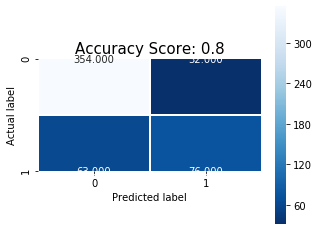

In [37]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [43]:
def profile_decile(X,y, trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred=trained_model.predict(X_1)
    X_1["Prob_event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred
    X_1["Rank"]=pd.qcut(X_1["Prob_event"],10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    profile=pd.DataFrame(X_1.groupby("Decile")\
                        .apply(lambda x: pd.Series({
        "min_score": x["Prob_event"].min(),
        "max_score": x["Prob_event"].max(),
        "Bad":x["Y_actual"].sum(),
        "Good":x["Y_actual"].count()-x["Y_actual"].sum(),
        "Total":x["Y_actual"].count() })))
    return profile

In [45]:
profile_train=profile_decile(x_train, y_train, logisticRegr)

In [46]:
profile_train.to_csv("C:\\Users\\Admin\\Desktop\\Training\\DSP31\\Python\\Logistics\\profile_train.csv")

In [47]:
profile_test=profile_decile(x_test, y_test, logisticRegr)
profile_test.to_csv("C:\\Users\\Admin\\Desktop\\Training\\DSP31\\Python\\Logistics\\profile_test.csv")

In [49]:
probs=logisticRegr.predict_proba(x_train)[:,1]

No handles with labels found to put in legend.


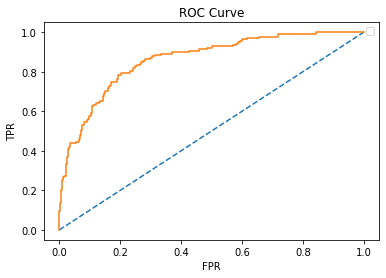

In [54]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_train, probs)
AUC

0.8620606105788943

In [36]:
#An AUC score is a measure of the likelihood that the model that produced the
#predictions will rank a randomly chosen positive example above a randomly chosen negative example.
#Specifically, that the probability will be higher for a real event (class=1) than a real non-event 
#(class=0).
#Naive Prediction. A naive prediction under ROC AUC is any constant probability. 
#If the same probability is predicted for every example, there is no discrimination between positive
#and negative cases, therefore the model has no skill (AUC=0.5).

#Insensitivity to Class Imbalance. ROC AUC is a summary on the models ability to correctly 
#discriminate a single example across different thresholds. As such, it is unconcerned with the
#base likelihood of each class.

In [ ]:
#p value, Accuracy, Recall, Precision, ks Values , F1 score, Confusion matrix,ROC, AUC

In [ ]:
Accuacy, Precision , Recall, F1 score, lift, KS,ROC, AUC, GAIN, BAD Rate,

In [ ]:
Training , testing ( Close to same )

In [56]:
X=x_train.copy()

In [57]:
X["Prob_default"]=logisticRegr.predict_proba(x_train)[:,1]

In [58]:
X["Actual_Default"]=y_train

In [60]:
X["Pred_default"]=logisticRegr.predict(x_train)

In [61]:

X.to_csv("C:\\Users\\Admin\\Desktop\\Training\\DSP31\\Python\\Logistics\\X_train1.csv")

In [62]:
# Selected prob=0.25

In [64]:
df_new_customer.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [65]:
df_new_customer.drop(columns=["default"], inplace=True)

In [66]:
new_cust=df_new_customer.copy()

In [67]:
new_cust["Prob_default"]=logisticRegr.predict_proba(df_new_customer)[:,1]

In [68]:
new_cust["New_Default"]=np.where(new_cust["Prob_default"]>=.25,1,0)

In [69]:
new_cust.New_Default.value_counts()

0    93
1    57
Name: New_Default, dtype: int64

In [70]:
import pickle

In [71]:
log=pickle.dumps(logisticRegr)

In [73]:
# Load the pickled model 
log_from_pickle = pickle.loads(log) 

In [76]:
cust=pd.read_csv("C:/Users/Admin/Desktop/Training/DSP31/Python/Logistics/New_application.csv")

In [77]:
cust["Prob_default"]=log_from_pickle.predict_proba(cust)[:,1]

In [78]:
cust

,age,ed,employ,address,income,debtinc,creddebt,othdebt,Prob_default
0,40,2,13,11,102,18.90,6.226794,13.051206,0.720232
1,42,3,10,1,103,12.56,3.670000,16.890000,0.769808
2,24,1,2,10,80,8.30,1.670000,4.600000,0.401110


In [ ]:
Loss(Y-yPredict) 

In [78]:
logisticRegr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [79]:
from sklearn.linear_model import SGDClassifier
logreg_SGD = SGDClassifier(loss="log",max_iter=1000, early_stopping=True)

In [81]:
logreg_SGD.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [82]:
logreg_SGD.score(x_train, y_train)

0.7657142857142857

In [83]:
logreg_SGD.score(x_test, y_test)

0.7371428571428571

In [85]:
from sklearn import model_selection
#import cross validation score model from sklearn
from sklearn.model_selection import cross_val_score
#create model selection object with number of splits
kfold = model_selection.KFold(n_splits=10, random_state=0)

#creat a logistic regression model with SGD
modelCV = SGDClassifier(loss="log", tol=0.01,eta0=1.0,learning_rate="adaptive", max_iter=1000, early_stopping=True)

#call cross_val_score
results = model_selection.cross_val_score(modelCV, x, y, cv=10 , scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
print(results)

10-fold cross validation average accuracy: 0.785
[0.73239437 0.77464789 0.76056338 0.75714286 0.82857143 0.84285714
 0.71428571 0.8115942  0.86956522 0.75362319]


In [86]:
from sklearn.linear_model import SGDClassifier
from time import time
from sklearn.model_selection import GridSearchCV

logreg_SGD = SGDClassifier(loss='log')

In [87]:
param_grid = {"n_iter": [1, 5, 10],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
             "tol":[0.0001, 0.001, 0.01, 0.1, 1],
             "eta0":[0.2,0.5,1.0,1.5,2.0,2.5,3.0],
             "learning_rate":["adaptive"]}

In [ ]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

#create grid search object
grid_search = GridSearchCV(logreg_SGD, param_grid=param_grid)

grid_search.fit(X_train, y_train);